In [338]:
import tensorflow as tf
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.interpolate import interp1d

In [339]:
file_name="/home/agostini/Development/fpgpu/resnet-1-4-4-4-4-1-gold/resnet50_train/events.out.tfevents.1564352609.highfreq"
my_values = list()
for summary in tf.train.summary_iterator(file_name):
    for v in summary.summary.value:
        #if v.tag == 'Conv' or v.tag == 'Other name':
            my_values.append(v.simple_value)
            
my_values = np.array(my_values)

In [340]:
print(my_values)

[1. 1. 0. ... 0. 0. 0.]


# Collect sparsity of tensors after Relu

In [341]:
file_name="/home/agostini/Development/fpgpu/resnet-1-4-4-4-4-1-gold/resnet50_train/events.out.tfevents.1564352609.highfreq"
my_dict=defaultdict(list)
for summary in tf.train.summary_iterator(file_name):
    for v in summary.summary.value:
        if ("Relu/sparsity" in v.tag) and not("Relu/sparsity_histo" in v.tag):
            my_dict[v.tag].append(v.simple_value)
        
print("All the values that have sparsity are presented in: my_dict")    

All the values that have sparsity are presented in: my_dict


In [342]:
for k,v in my_dict.items():
    print(k)
    print(len(v))

conv1_0/conv2_in_block/Relu/sparsity
201
conv1_1/conv1_in_block/Relu/sparsity
201
conv1_1/conv2_in_block/Relu/sparsity
201
conv2_0/conv1_in_block/Relu/sparsity
201
conv2_0/conv2_in_block/Relu/sparsity
201
conv2_1/conv1_in_block/Relu/sparsity
201
conv2_1/conv2_in_block/Relu/sparsity
201
conv3_0/conv1_in_block/Relu/sparsity
201
conv3_0/conv2_in_block/Relu/sparsity
201
conv3_1/conv1_in_block/Relu/sparsity
201
conv3_1/conv2_in_block/Relu/sparsity
201
conv4_0/conv1_in_block/Relu/sparsity
201
conv4_0/conv2_in_block/Relu/sparsity
201
conv4_1/conv1_in_block/Relu/sparsity
201
conv4_1/conv2_in_block/Relu/sparsity
201


In [343]:
forward_count = 0
back_count=0 # Ignored for now
back_special_count=0 # Ignored for now
for k in my_dict.keys():
    if("Relu/sparsity" in k) and not("Relu/sparsity_histo" in k):
        forward_count+=1
print(forward_count, back_count, back_special_count)

15 0 0


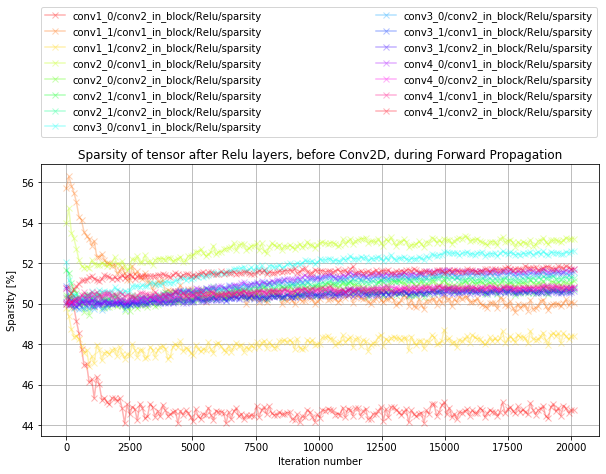

In [344]:
NUM_COLORS = forward_count
LOG_INTERVAL = 100

#cm = plt.get_cmap('gist_rainbow')
plt.figure(figsize=[10,5])
ax = plt.gca()
ax.set_prop_cycle('color',plt.cm.hsv(np.linspace(0,1,NUM_COLORS)))
for k,v in my_dict.items():
    #if (not(("_grad/" in k) or ("/gradients/" in k))):

        my_values = np.array(v)*100
        #plt.scatter(np.linspace(1,9901,len(my_values)), my_values,marker='o')
        plt.plot(np.linspace(1,len(my_values)*LOG_INTERVAL,len(my_values)), my_values,marker='x', alpha=0.3, label=k)


    #ax.set(ylim=(0, 1))    

plt.grid()
ax.legend(loc=(0,1.1),
           ncol=2, mode="expand", borderaxespad=0.1)
plt.title("Sparsity of tensor after Relu layers, before Conv2D, during Forward Propagation")
plt.ylabel("Sparsity [%]")
plt.xlabel("Iteration number")

plt.savefig("figs/cifar10_relu_forward_selected.png",bbox_inches='tight', dpi=450)

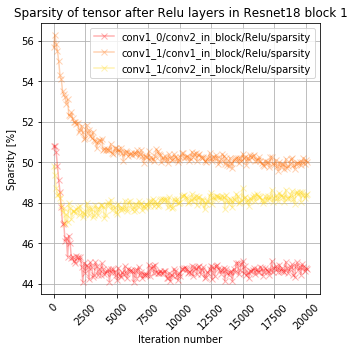

In [348]:
NUM_COLORS = forward_count
LOG_INTERVAL = 100
block_number=1
axis_limits=False

#cm = plt.get_cmap('gist_rainbow')
plt.figure(figsize=[5,5])
ax = plt.gca()
ax.set_prop_cycle('color',plt.cm.hsv(np.linspace(0,1,NUM_COLORS)))
for n in range(4*(block_number-1)):
    ax._get_lines.get_next_color()
for k,v in my_dict.items():
    if ("conv"+str(block_number)+"_0" in k)or("conv"+str(block_number)+"_1" in k):

        my_values = np.array(v)*100
        #plt.scatter(np.linspace(1,9901,len(my_values)), my_values,marker='o')
        plt.plot(np.linspace(1,len(my_values)*LOG_INTERVAL,len(my_values)), my_values,marker='x', alpha=0.3, label=k)


    #ax.set(ylim=(0, 1))    

plt.grid()
#ax.legend(loc=(0,1.1))
ax.legend()
if(axis_limits):
    plt.ylim([43,55])
plt.xticks(rotation=45)
plt.title("Sparsity of tensor after Relu layers in Resnet18 block "+str(block_number))
plt.ylabel("Sparsity [%]")
plt.xlabel("Iteration number")

plt.savefig("figs/cifar10_relu_forward_selected_conv"+str(block_number)+".png",bbox_inches='tight', dpi=450)

# Collect Histogram of im2col(tensor/after/Relu)

In [263]:
file_name="/home/agostini/Development/fpgpu/resnet-1-4-4-4-4-1-gold/resnet50_train/events.out.tfevents.1564352609.highfreq"
my_dict=defaultdict(list)
last_v = ()
for summary in tf.train.summary_iterator(file_name):
    for v in summary.summary.value:
        if ("Relu/sparsity_histo" in v.tag):
            my_dict[v.tag].append(v)

# Last item of bins is a number supper big, bigget then 1, so make it one
for k,v in my_dict.items():
    for histogram in v:
        if histogram.histo.bucket_limit[-1]>1:
            histogram.histo.bucket_limit[-1] = 1            

print("All the im2col values that have sparsity are presented in: my_dict") 

All the im2col values that have sparsity are presented in: my_dict


In [264]:
print(my_dict["conv1_0/conv2_in_block/Relu/sparsity_histo"][0].histo.bucket_limit)

[0.35363819004775493, 0.38900200905253046, 0.42790220995778355, 0.47069243095356195, 0.5177616740489182, 0.56953784145381, 0.6264916255991911, 0.6891407881591103, 0.7580548669750213, 0.8338603536725235, 0.917246389039776, 1.0]


In [265]:
def get_iter_idx(iteration_number, n_of_logs, LOG_INTERVAL = 100):
    """Returns the index for a given iteration given a LOG_INTERVAL and number of logs"""
    try:
        if(iteration_number > n_of_logs*LOG_INTERVAL):
            raise NameError(
                'Iteration Number is too big, must be smaller then :'+
                str(n_of_logs*LOG_INTERVAL))
    except NameError:
        raise
        
    return  iteration_number//100

get_iter_idx(5000,len(my_dict["conv1_0/conv2_in_block/Relu/sparsity_histo"]))

50

In [266]:
def get_tensor_name(block_id,sublock_id,conv_id):
    "Returns the tensor name for RESNET 1-4-4-4-4-1"
    return "conv"+str(1+block_id)+"_"+str(sublock_id)+"/conv"+str(1+conv_id)+"_in_block/Relu/sparsity_histo"

get_tensor_name(1,1,1)

'conv2_1/conv2_in_block/Relu/sparsity_histo'

[0.42790220995778355, 0.47069243095356195, 0.5177616740489182, 0.56953784145381, 0.6264916255991911, 0.6891407881591103, 0.7580548669750213, 0.8338603536725235, 1.0]
Column sparsity density function for im2col(tensor):
conv3_1/conv2_in_block/Relu/sparsity_histo
iteration :500


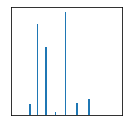

Column sparsity density function for im2col(tensor):
conv3_1/conv2_in_block/Relu/sparsity_histo
iteration :1000


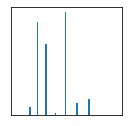

Column sparsity density function for im2col(tensor):
conv3_1/conv2_in_block/Relu/sparsity_histo
iteration :2000


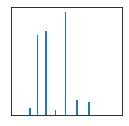

Column sparsity density function for im2col(tensor):
conv3_1/conv2_in_block/Relu/sparsity_histo
iteration :3000


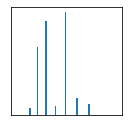

Column sparsity density function for im2col(tensor):
conv3_1/conv2_in_block/Relu/sparsity_histo
iteration :5000


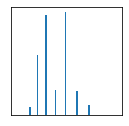

Column sparsity density function for im2col(tensor):
conv3_1/conv2_in_block/Relu/sparsity_histo
iteration :10000


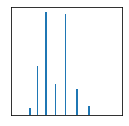

Column sparsity density function for im2col(tensor):
conv3_1/conv2_in_block/Relu/sparsity_histo
iteration :20000


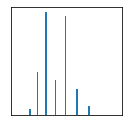

In [267]:
iter_numbers = [500, 1000, 2000,3000,5000,10000,20000]
tensor_name=get_tensor_name(2,1,1)


for k,v in my_dict.items():
    if k ==tensor_name:
        print (histogram.histo.bucket_limit)
        #print (len(histogram.histo.bucket_limit))
        for n in iter_numbers:
            histogram = v[get_iter_idx(
                n,
                len(v)
            )]
            print("Column sparsity density function for im2col(tensor):")
            print(k)
            print("iteration :"+str(n))
            plt.figure(figsize = (2,2))
            b = histogram.histo.bucket_limit
            s = np.array(histogram.histo.bucket).astype(np.int)

            # Plot bar
            plt.bar(b,s,width=0.01)

            # Plot line
            #f = interp1d(b, s, kind='linear')
            #xnew = np.linspace(b[0], b[-1], num=100, endpoint=True)
            #plt.plot(xnew, f(xnew), '-', alpha = 0.4)

            # remove axis
            cur_axes = plt.gca()
            cur_axes.axes.get_xaxis().set_visible(False)
            cur_axes.axes.get_yaxis().set_visible(False)
            plt.show()


# Generating data from im2col stats

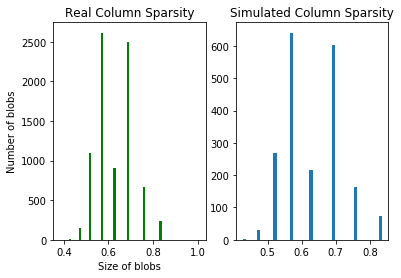

In [268]:
def calculateCDFfromCountList(list_of_counts):
    cdf = np.cumsum(list_of_counts)
    cdf = cdf / cdf[-1]
    return cdf

def calculateCDFfromDict(my_dict):
    list_of_counts = list(my_dict.values())
    return calculateCDFfromCountList(list_of_counts)

def getBinIndexFromCDF(cdf):
    return np.searchsorted(cdf,np.random.rand())

def getBinFromCDFandBins(cdf,bins):
    return bins[int(getBinIndexFromCDF(cdf))]

def getBinFromCDFandDict(cdf,my_dict):
    return list(my_dict.keys())[getBinIndexFromCDF(cdf)]


cdf = calculateCDFfromCountList(s)
values = np.random.rand(2000)

random_bin_from_cdf = [getBinFromCDFandBins(cdf,b) for val in values]

plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.bar(b, s, color='g', width=0.01)
plt.title('Real Column Sparsity')
plt.ylabel('Number of blobs')
plt.xlabel('Size of blobs')

ax2= plt.subplot(1, 2, 2)
plt.hist(random_bin_from_cdf, 50, width=0.01)
plt.title('Simulated Column Sparsity')

plt.show()

In [269]:
np.random.seed(None)
def generateMatrixFromCDF(n_rows,n_cols,cdf,bins, spread=[-1,1]):
    matrix = np.random.uniform(low=spread[0], high=spread[1], size=(n_rows,n_cols))
    
    # for each line generate a new column
    for row in range(n_rows):
        sparsity = getBinFromCDFandBins(cdf,bins)
        mask = np.random.choice([0, 1], size=n_cols, p=[sparsity, 1-sparsity])
        
        matrix[row,:]=np.multiply(matrix[row,:],mask)
        
    return matrix

def generateShiMatrix(n_rows,n_cols,cdf,bins, spread=[-1,1]):
    return np.transpose(generateMatrixFromCDF(n_cols,n_rows,cdf,bins,spread))
    

# Resnet tensor
block_id=1
sublock_id=1
conv_id=1
iter_number=5000

# Get bins and counts
b=my_dict[get_tensor_name(block_id,sublock_id,conv_id)][
    get_iter_idx(iter_number,len(my_dict[get_tensor_name(block_id,sublock_id,conv_id)]))
].histo.bucket_limit


s=my_dict[get_tensor_name(block_id,sublock_id,conv_id)][
    get_iter_idx(iter_number,len(my_dict[get_tensor_name(block_id,sublock_id,conv_id)]))
].histo.bucket

# calculate CDF
cdf = calculateCDFfromCountList(s)

# Generate the matrix
gem_matrix = generateShiMatrix(50,5,cdf,b)
print("Sparsity of im2col matrix = " + str(1-(np.count_nonzero(gem_matrix)/gem_matrix.size)))
print(gem_matrix)

Sparsity of im2col matrix = 0.604
[[ 0.36741122  0.          0.         -0.15159394 -0.        ]
 [ 0.35418164 -0.         -0.20438012 -0.08738381 -0.        ]
 [ 0.90449235 -0.         -0.34502459 -0.         -0.        ]
 [-0.         -0.         -0.         -0.76452478 -0.        ]
 [-0.         -0.         -0.         -0.         -0.09752976]
 [ 0.09879781  0.          0.         -0.37363322  0.28217189]
 [ 0.          0.          0.          0.05251147 -0.19791402]
 [-0.          0.          0.          0.84116263  0.45525831]
 [-0.          0.          0.82484476 -0.         -0.        ]
 [-0.09738544  0.07220026  0.          0.          0.        ]
 [ 0.         -0.         -0.         -0.99766873 -0.        ]
 [ 0.         -0.         -0.         -0.         -0.21633614]
 [-0.45036361 -0.         -0.         -0.39157663 -0.        ]
 [ 0.29362025 -0.          0.         -0.         -0.        ]
 [ 0.          0.74101606  0.          0.          0.        ]
 [ 0.          0.    

In [288]:
def get_sparsity(m):
    return 1-(np.count_nonzero(m)/m.size)

def generateIM2COLmatrices(batch_size,in_height,in_width,n_channels,k_size,n_filters,cdf,b):
    M = n_filters
    N = in_height*in_width*batch_size
    K = k_size*k_size*n_channels
    filters = np.random.uniform(low=-1, high=1, size=(M,K))
    images = generateShiMatrix(K,N,cdf,b)
    return filters, images


batch_size = 1
in_height = 16
in_width = 16
n_channels = 128
k_size = 3
n_filters = 128

# Resnet tensor
block_id=1
sublock_id=0
conv_id=1
iter_number=5000

tensor_name = get_tensor_name(block_id,sublock_id,conv_id)

# Get bins and counts
b=my_dict[tensor_name][
    get_iter_idx(iter_number,len(my_dict[tensor_name]))
].histo.bucket_limit


s=my_dict[tensor_name][
    get_iter_idx(iter_number,len(my_dict[tensor_name]))
].histo.bucket

cdf = calculateCDFfromCountList(s)

filters, images = generateIM2COLmatrices(
    batch_size,in_height,in_width,n_channels,k_size,n_filters,cdf,b)

print (tensor_name)
print("Matrix A: Filters ({}), sparsity = {}".format(filters.shape,get_sparsity(filters)))

print("Matrix B: Images ({}), sparsity = {}".format(images.shape,get_sparsity(images)))

conv2_0/conv2_in_block/Relu/sparsity_histo
Matrix A: Filters ((128, 1152)), sparsity = 0.0
Matrix B: Images ((1152, 256)), sparsity = 0.5766194661458333


# Generating Tensors for different instances:

## Common parametrs

In [333]:
iter_number=200
batch_size=1

save_matrices=True

## Last convolution forth block: conv4_1/conv2_in_block

In [334]:
batch_size = batch_size
in_height = 4
in_width = 4
n_channels = 512
k_size = 3
n_filters = 512

# Resnet tensor
block_id=3
sublock_id=1
conv_id=1
iter_number=iter_number

tensor_name = get_tensor_name(block_id,sublock_id,conv_id)

# Get bins and counts
b=my_dict[tensor_name][
    get_iter_idx(iter_number,len(my_dict[tensor_name]))
].histo.bucket_limit


s=my_dict[tensor_name][
    get_iter_idx(iter_number,len(my_dict[tensor_name]))
].histo.bucket

cdf = calculateCDFfromCountList(s)

filters, images = generateIM2COLmatrices(
    batch_size,in_height,in_width,n_channels,k_size,n_filters,cdf,b)

print (tensor_name)
print("Matrix A: Filters ({}), sparsity = {}".format(filters.shape,get_sparsity(filters)))

print("Matrix B: Images ({}), sparsity = {}".format(images.shape,get_sparsity(images)))

if(save_matrices):
    file_name_filters = "im2col-data/filters-bs{}-h{}-w{}-c{}-k{}-d{}-bid{}-sbid{}-cid{}-iters{}".format(
        batch_size,
        in_height,
        in_width,
        n_channels,
        k_size,
        n_filters, # d -> number of output channels
        block_id,
        sublock_id,
        conv_id,
        iter_number
    )
    file_name_images = "im2col-data/images-bs{}-h{}-w{}-c{}-k{}-d{}-bid{}-sbid{}-cid{}-iters{}".format(
        batch_size,
        in_height,
        in_width,
        n_channels,
        k_size,
        n_filters, # d -> number of output channels
        block_id,
        sublock_id,
        conv_id,
        iter_number
    )
    np.save(file_name_filters,filters)
    np.save(file_name_images, images)

conv4_1/conv2_in_block/Relu/sparsity_histo
Matrix A: Filters ((512, 4608)), sparsity = 0.0
Matrix B: Images ((4608, 16)), sparsity = 0.6709255642361112


## last convolution third block: conv3_1/conv2_in_block/Relu/

In [335]:
batch_size = batch_size
in_height = 8
in_width = 8
n_channels = 256
k_size = 3
n_filters = 256

# Resnet tensor
block_id=2
sublock_id=1
conv_id=1
iter_number=iter_number

tensor_name = get_tensor_name(block_id,sublock_id,conv_id)

# Get bins and counts
b=my_dict[tensor_name][
    get_iter_idx(iter_number,len(my_dict[tensor_name]))
].histo.bucket_limit


s=my_dict[tensor_name][
    get_iter_idx(iter_number,len(my_dict[tensor_name]))
].histo.bucket

cdf = calculateCDFfromCountList(s)

filters, images = generateIM2COLmatrices(
    batch_size,in_height,in_width,n_channels,k_size,n_filters,cdf,b)

print (tensor_name)
print("Matrix A: Filters ({}), sparsity = {}".format(filters.shape,get_sparsity(filters)))

print("Matrix B: Images ({}), sparsity = {}".format(images.shape,get_sparsity(images)))

if(save_matrices):
    file_name_filters = "im2col-data/filters-bs{}-h{}-w{}-c{}-k{}-d{}-bid{}-sbid{}-cid{}-iters{}".format(
        batch_size,
        in_height,
        in_width,
        n_channels,
        k_size,
        n_filters, # d -> number of output channels
        block_id,
        sublock_id,
        conv_id,
        iter_number
    )
    file_name_images = "im2col-data/images-bs{}-h{}-w{}-c{}-k{}-d{}-bid{}-sbid{}-cid{}-iters{}".format(
        batch_size,
        in_height,
        in_width,
        n_channels,
        k_size,
        n_filters, # d -> number of output channels
        block_id,
        sublock_id,
        conv_id,
        iter_number
    )
    np.save(file_name_filters,filters)
    np.save(file_name_images, images)

conv3_1/conv2_in_block/Relu/sparsity_histo
Matrix A: Filters ((256, 2304)), sparsity = 0.0
Matrix B: Images ((2304, 64)), sparsity = 0.6403266059027778


## last convolution second block: conv2_1/conv2_in_block/Relu

In [336]:
batch_size = batch_size
in_height = 16
in_width = 16
n_channels = 128
k_size = 3
n_filters = 128

# Resnet tensor
block_id=1
sublock_id=1
conv_id=1
iter_number=iter_number

tensor_name = get_tensor_name(block_id,sublock_id,conv_id)

# Get bins and counts
b=my_dict[tensor_name][
    get_iter_idx(iter_number,len(my_dict[tensor_name]))
].histo.bucket_limit


s=my_dict[tensor_name][
    get_iter_idx(iter_number,len(my_dict[tensor_name]))
].histo.bucket

cdf = calculateCDFfromCountList(s)

filters, images = generateIM2COLmatrices(
    batch_size,in_height,in_width,n_channels,k_size,n_filters,cdf,b)

print (tensor_name)
print("Matrix A: Filters ({}), sparsity = {}".format(filters.shape,get_sparsity(filters)))

print("Matrix B: Images ({}), sparsity = {}".format(images.shape,get_sparsity(images)))

if(save_matrices):
    file_name_filters = "im2col-data/filters-bs{}-h{}-w{}-c{}-k{}-d{}-bid{}-sbid{}-cid{}-iters{}".format(
        batch_size,
        in_height,
        in_width,
        n_channels,
        k_size,
        n_filters, # d -> number of output channels
        block_id,
        sublock_id,
        conv_id,
        iter_number
    )
    file_name_images = "im2col-data/images-bs{}-h{}-w{}-c{}-k{}-d{}-bid{}-sbid{}-cid{}-iters{}".format(
        batch_size,
        in_height,
        in_width,
        n_channels,
        k_size,
        n_filters, # d -> number of output channels
        block_id,
        sublock_id,
        conv_id,
        iter_number
    )
    np.save(file_name_filters,filters)
    np.save(file_name_images, images)

conv2_1/conv2_in_block/Relu/sparsity_histo
Matrix A: Filters ((128, 1152)), sparsity = 0.0
Matrix B: Images ((1152, 256)), sparsity = 0.5699801974826388


## last convolution second block: conv1_1/conv2_in_block/Relu

In [337]:
batch_size = batch_size
in_height = 32
in_width = 32
n_channels = 64
k_size = 3
n_filters = 64

# Resnet tensor
block_id=0
sublock_id=1
conv_id=1
iter_number=iter_number

tensor_name = get_tensor_name(block_id,sublock_id,conv_id)

# Get bins and counts
b=my_dict[tensor_name][
    get_iter_idx(iter_number,len(my_dict[tensor_name]))
].histo.bucket_limit


s=my_dict[tensor_name][
    get_iter_idx(iter_number,len(my_dict[tensor_name]))
].histo.bucket

cdf = calculateCDFfromCountList(s)

filters, images = generateIM2COLmatrices(
    batch_size,in_height,in_width,n_channels,k_size,n_filters,cdf,b)

print (tensor_name)
print("Matrix A: Filters ({}), sparsity = {}".format(filters.shape,get_sparsity(filters)))

print("Matrix B: Images ({}), sparsity = {}".format(images.shape,get_sparsity(images)))

if(save_matrices):
    file_name_filters = "im2col-data/filters-bs{}-h{}-w{}-c{}-k{}-d{}-bid{}-sbid{}-cid{}-iters{}".format(
        batch_size,
        in_height,
        in_width,
        n_channels,
        k_size,
        n_filters, # d -> number of output channels
        block_id,
        sublock_id,
        conv_id,
        iter_number
    )
    file_name_images = "im2col-data/images-bs{}-h{}-w{}-c{}-k{}-d{}-bid{}-sbid{}-cid{}-iters{}".format(
        batch_size,
        in_height,
        in_width,
        n_channels,
        k_size,
        n_filters, # d -> number of output channels
        block_id,
        sublock_id,
        conv_id,
        iter_number
    )
    np.save(file_name_filters,filters)
    np.save(file_name_images, images)

conv1_1/conv2_in_block/Relu/sparsity_histo
Matrix A: Filters ((64, 576)), sparsity = 0.0
Matrix B: Images ((576, 1024)), sparsity = 0.5332828097873263
